<a href="https://colab.research.google.com/github/atreyid/Facial-Keypoints-Recognition-/blob/main/Facial_Keypoint_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


## Facial Keypoints Detection
#### Detect the location of keypoints on face images

### Data:

There are 15 keypoints that specifies the position of facial features by an (x,y) real-valued pair. These 15 pairs comprise of 3 for each eye (center, inner corner and outer corner positions), 2 for each eyebrow (inner and out end positions), 1 for the nose and 4 (left corner, right corner, top and bottom positions) for the lip.
<p> To predict: Keypoint Locations of the 1783 test images.
<p> Application for such a model: Applying filters on Instagram, buying eyeglasses online
    
#### Our goal for this project is to score an accuracy of 80% or higher. 

 ## Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('training.csv')
df_train.shape

(7049, 31)

In [ ]:
df_train.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [ ]:
df_train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,2268.000000,2268.000000,2270.000000,2270.000000,2225.000000,2225.000000,2270.000000,2270.000000,2236.000000,2236.000000,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,3.057122,2.910368,3.485485,3.078134,3.986224,3.773744,3.209641,3.106869,3.622533,3.865772,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,20.585808,36.534382,54.515587,27.617244,77.673916,27.667948,37.552286,27.790607,13.562183,28.206046,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,22.535954,37.867071,56.244975,29.528872,79.784229,29.773813,39.298848,29.569347,15.785709,30.320160,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,24.237701,39.415051,57.946415,31.158830,81.590720,31.835621,40.917160,31.251664,17.999040,32.654768,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
'''
The Image column is a string, need to convert that to numpy araay. 
As the pixel values range from 0 to 256, apart from 0 the range is 255. 
So dividing all the values by 255 will convert it to range from 0 to 1.
'''
def convert_data_to_image(image_data):
    images = []
    for _, sample in image_data.iterrows():
        image = np.array(sample["Image"].split(' '), dtype=int)
        image = np.reshape(image, (96,96,1))
        images.append(image)
    images = np.array(images)/255
    return images

In [ ]:
#Getting keypoint features from the training dataframe
def get_keypoints_features(keypoint_data):
    keypoint_data = keypoint_data.drop("Image", axis=1)
    keypoint_features = []
    for _, sample_keypoints in keypoint_data.iterrows():
        keypoint_features.append(sample_keypoints)
    
    keypoint_features = np.array(keypoint_features, dtype="float")
    return keypoint_features

In [ ]:
#Method to plot the images
def plot_sample(image, keypoint, axis, title):
    image = image.reshape(96,96)
    axis.imshow(image, cmap="gray")
    axis.scatter(keypoint[::2], keypoint[1::2], marker='x', color = 'red',s=20)
    plt.title(title)

In [ ]:
train_images = convert_data_to_image(df_train)
train_keypoints = get_keypoints_features(df_train)

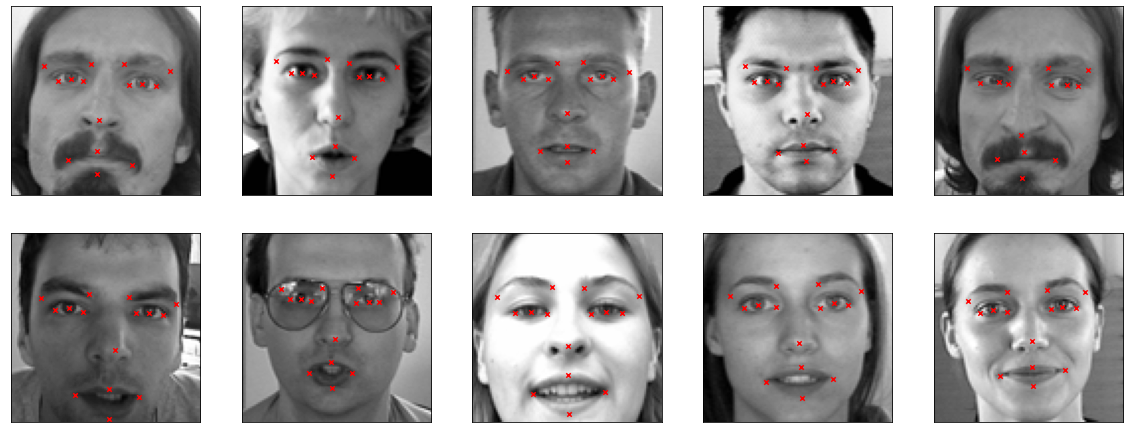

In [ ]:
'''
Let's take a look at the first 10 images in the training dataframe.
We mark the keypoints on each face in red.
'''
fig = plt.figure(figsize=(20,16))
for i in range(10):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(train_images[i], train_keypoints[i], axis, "")
plt.show()

Our training data has a lot of missing keypoint features. Let's take a look at the number of missing rows for each column. 

In [ ]:
#Check for empty entries
df_train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

A bar plot shows it better ..

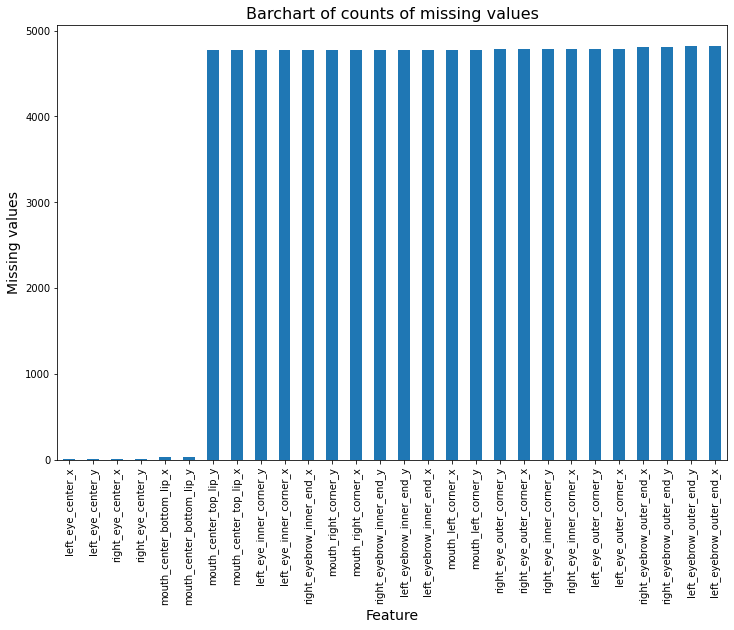

In [ ]:
missing_cols = df_train.isnull().sum()
missing_cols
plot_cols = missing_cols[missing_cols>0] # drop 0 count cols
plot_cols.sort_values(inplace=True)
plot_cols.plot.bar(figsize=(12,8))
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Missing values",fontsize=14)
plt.title("Barchart of counts of missing values",fontsize=16)
plt.show()

The number of columns that are mising is < 5000 which is a significant amount of the data. We will talk about how to deal with these missing data in a forthcoming section.

## Training of the Base Model

The rows that have missing data in the training set are classified as low-resolution images. On the contrary the images that have no missing keypoints are of high resolution. In this first model that we train, we will not separate the high resolution images from the low resolution ones in order to have a starting baseline. This base model will allow us to assess the approaches for filling missing values using a common model.


In [ ]:
# However to ensure we get a valid accuracy with the CNN model later, the missing entries in the training data set are replaced by zero. 
df_train_zero = df_train.replace(np.nan,0)

In [ ]:
df_train_zero['Image'] = df_train_zero['Image'].apply(lambda x: np.fromstring(x, dtype=float, sep=' ').reshape((96,96)))

In [ ]:
'''
This method groups the keypoints in a seperate dataframe called features and in the images in a list called img.
'''
def process_df(df):
  img = [im for im in df['Image']]
  img = np.array(img,dtype = 'float')
  print(img.shape)
  img = np.asarray(img, dtype=np.uint8).reshape(df.shape[0],96,96,1)
  print(img.shape)
  
  feature = df.drop('Image',axis = 1)
  y = []
  for i in range(df.shape[0]):
    points = feature.iloc[i,:]
    y.append(points)
  y = np.array(y,dtype = 'float') 

  return img,y

In [ ]:
X, y = process_df(df_train_zero)

(7049, 96, 96)
(7049, 96, 96, 1)


In [ ]:
#Splitting 20% of the training data to dev set
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout
from keras.metrics import RootMeanSquaredError
from keras.layers.advanced_activations import LeakyReLU
from keras import metrics

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), padding='same', use_bias=False))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(30,activation='elu'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 96, 96, 64)        18432     
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (None, 96, 96, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 96, 96, 64)        36864     
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (None, 96, 96, 64)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 48, 48, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs = 100,batch_size = 256,validation_data=(X_dev,y_dev))

Epoch 1/100
23/23 [==============================] - 5s 167ms/step - loss: 1622.7681 - accuracy: 0.4564 - val_loss: 588.5978 - val_accuracy: 0.8702
Epoch 2/100
23/23 [==============================] - 3s 149ms/step - loss: 495.9973 - accuracy: 0.8821 - val_loss: 447.8537 - val_accuracy: 0.8702
Epoch 3/100
23/23 [==============================] - 3s 148ms/step - loss: 418.5301 - accuracy: 0.8944 - val_loss: 423.7028 - val_accuracy: 0.8702
Epoch 4/100
23/23 [==============================] - 3s 148ms/step - loss: 392.4079 - accuracy: 0.9010 - val_loss: 379.7982 - val_accuracy: 0.8369
Epoch 5/100
23/23 [==============================] - 3s 149ms/step - loss: 380.8558 - accuracy: 0.8836 - val_loss: 357.5596 - val_accuracy: 0.8702
Epoch 6/100
23/23 [==============================] - 3s 149ms/step - loss: 341.0533 - accuracy: 0.8911 - val_loss: 347.0110 - val_accuracy: 0.8248
Epoch 7/100
23/23 [==============================] - 3s 148ms/step - loss: 322.8138 - accuracy: 0.8738 - val_loss: 30

In the logs for training the Base model, 'val_accuracy' refers to the validation set. This is a measure of the accuracy for a set of samples that was not shown to the network during training and hence refers to how much our model works in general for cases outside the training set. 


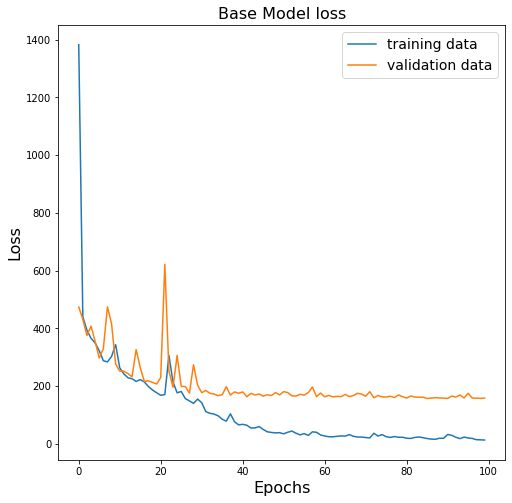

In [ ]:
#Compare loss function computed as a Root Mean Squared error for both training and dev sets
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Base Model loss',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epochs',fontsize=16)
plt.legend(['training data', 'validation data'], loc='upper right',fontsize=14)

From the above two plots, it is clear that the model performs better for the training data as compared to the validation dev data.
<p> We thus take a look at dealing with the missing values with an aim to improve the overall accuracy of our model. 

## Handling of Missing Values

Here we explore two different approaches to deal with the missing values in the training data. 

### KNN Imputation of Missing Values:
A popular approach to missing data imputation is to use a model to predict the missing values. The k-nearest neighbor (KNN) algorithm has proven to be generally effective, often referred to as “nearest neighbor imputation.” Here after some trial-and-error we choose k = 10.

In [ ]:
# Dropping the image axis as that column has a different data structure as well as  no missing data
df_train_knn = df_train.drop('Image',axis = 1)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')

In [ ]:
imputer.fit_transform(df_train_knn)

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [66.69073171, 36.84522146, 31.66641951, ..., 72.27907654,
        49.46257171, 78.11712   ],
       [70.96508235, 39.85366588, 30.54328471, ..., 76.87111833,
        50.06518588, 79.58644706],
       [66.93831111, 43.42450963, 31.09605926, ..., 78.10264274,
        45.90048   , 82.7730963 ]])

In [ ]:
np_train_knn_trans = imputer.transform(df_train_knn)

In [ ]:
#Change the kNN imputed numpy array to a dataframe and add back teh Image column
df_train_knn_transform = pd.DataFrame(np_train_knn_trans, columns = df_train_knn.columns)
df_train_knn_transform['Image'] = df_train['Image']
df_train_knn_transform['Image'] = df_train_knn_transform['Image'].apply(lambda x: np.fromstring(x, dtype=float, sep=' ').reshape((96,96)))

In [ ]:
#check for missing values again
df_train_knn_transform.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
# Pre-process data
X, y = process_df(df_train_knn_transform)

(7049, 96, 96)
(7049, 96, 96, 1)


In [ ]:
#Split data into training and dev sets
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Apply CNN model to kNN imputed dataset
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), padding='same', use_bias=False))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(30,activation='elu'))

In [ ]:
model_knn_impute = model

In [ ]:
model_knn_impute.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
history_knn_impute=model_knn_impute.fit(X_train,y_train,epochs = 100,batch_size = 256,validation_data=(X_dev,y_dev))

Epoch 1/100
23/23 [==============================] - 5s 173ms/step - loss: 2395.9391 - accuracy: 0.2060 - val_loss: 216.9492 - val_accuracy: 0.4135
Epoch 2/100
23/23 [==============================] - 3s 149ms/step - loss: 183.9983 - accuracy: 0.4368 - val_loss: 160.9205 - val_accuracy: 0.4121
Epoch 3/100
23/23 [==============================] - 3s 150ms/step - loss: 130.5181 - accuracy: 0.4341 - val_loss: 163.5114 - val_accuracy: 0.4298
Epoch 4/100
23/23 [==============================] - 3s 150ms/step - loss: 137.3070 - accuracy: 0.4561 - val_loss: 179.5486 - val_accuracy: 0.5376
Epoch 5/100
23/23 [==============================] - 3s 150ms/step - loss: 135.0280 - accuracy: 0.4894 - val_loss: 116.0010 - val_accuracy: 0.5574
Epoch 6/100
23/23 [==============================] - 3s 148ms/step - loss: 112.8174 - accuracy: 0.5079 - val_loss: 112.5063 - val_accuracy: 0.5589
Epoch 7/100
23/23 [==============================] - 3s 149ms/step - loss: 106.6517 - accuracy: 0.4864 - val_loss: 11

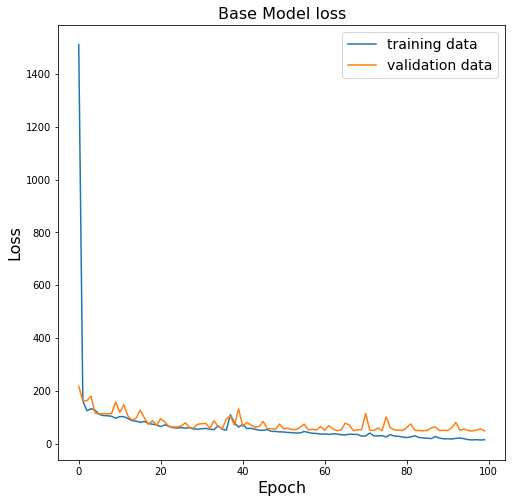

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history_knn_impute.history['loss'])
plt.plot(history_knn_impute.history['val_loss'])
plt.title('Base Model loss',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.legend(['training data', 'validation data'], loc='upper right',fontsize=14)

Replacing the missing values by k nearest neighbor values brings down our accuracy to 0.704 for the training set and the 0.656 for the dev set. However, the agreement of the model performance (loss and accuracy vs the number of epochs) for both training and dev dataset is great. 
<p> We are on the right track, but can we make the accuracy better ? 

### Dropping NA values


Here we try to drop missing values instead of filling them in. With this approach, we only keep our highest quality data.

In [ ]:
df_train_drop_na = df_train.dropna()
#df_train_drop_na = df_train_drop_na.reset_index(drop=True)

In [ ]:
df_train_drop_na['Image'] = df_train_drop_na['Image'].apply(lambda x: np.fromstring(x, dtype=float, sep=' ').reshape((96,96)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X,y = process_df(df_train_drop_na)

(2140, 96, 96)
(2140, 96, 96, 1)


In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Applying CNN model 
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), padding='same', use_bias=False))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(30,activation='elu'))

In [ ]:
model_drop_na = model

In [ ]:
model_drop_na.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
history_drop_na=model_drop_na.fit(X_train,y_train,epochs = 100,batch_size = 256,validation_data=(X_dev,y_dev))

Epoch 1/100
7/7 [==============================] - 4s 464ms/step - loss: 3654.2307 - accuracy: 0.2296 - val_loss: 870.8874 - val_accuracy: 0.6869
Epoch 2/100
7/7 [==============================] - 1s 151ms/step - loss: 690.0060 - accuracy: 0.4831 - val_loss: 208.1756 - val_accuracy: 0.0257
Epoch 3/100
7/7 [==============================] - 1s 151ms/step - loss: 241.8057 - accuracy: 0.0873 - val_loss: 180.9249 - val_accuracy: 0.7103
Epoch 4/100
7/7 [==============================] - 1s 151ms/step - loss: 179.2873 - accuracy: 0.6610 - val_loss: 153.4494 - val_accuracy: 0.7150
Epoch 5/100
7/7 [==============================] - 1s 164ms/step - loss: 155.2622 - accuracy: 0.7097 - val_loss: 119.0292 - val_accuracy: 0.6846
Epoch 6/100
7/7 [==============================] - 1s 152ms/step - loss: 131.4468 - accuracy: 0.4907 - val_loss: 115.0534 - val_accuracy: 0.6262
Epoch 7/100
7/7 [==============================] - 1s 151ms/step - loss: 115.6772 - accuracy: 0.6407 - val_loss: 113.7549 - val_a

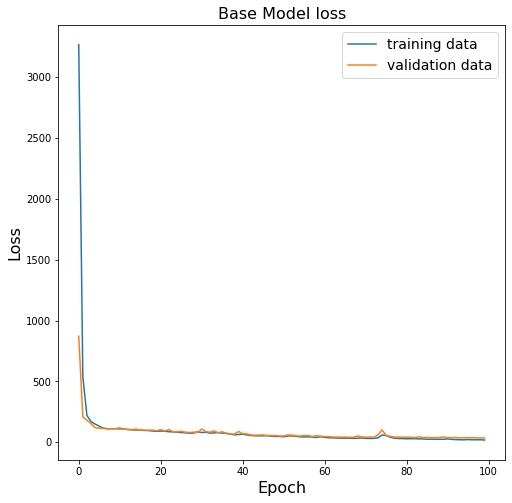

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history_drop_na.history['loss'])
plt.plot(history_drop_na.history['val_loss'])
plt.title('Base Model loss',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.legend(['training data', 'validation data'], loc='upper right',fontsize=14)

## Data Augmentation

Here we augment our data and add it to the training data so that our model will train on a variety of image types and image angles. Data Augmentation is a popular way to get more data by making minor alterations to our existing dataset. To implement these transformations and rotations we used the ndimage package from scipy.

In [ ]:
from scipy import ndimage

In [ ]:
df_train = pd.read_csv('training.csv')
df_train.shape

(7049, 31)

In [ ]:
df_train['Image'] = df_train['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [ ]:
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.shape

(2140, 31)

In [ ]:
slice_num = int(df_train.shape[0]/4)
slice_num

535

In [ ]:
#created eight different slices of the data
df_train_slice_1a = df_train.iloc[:slice_num].copy() 
df_train_slice_1b = df_train.iloc[:slice_num].copy() 

df_train_slice_2a = df_train.iloc[slice_num:slice_num*2].copy()
df_train_slice_2b = df_train.iloc[slice_num:slice_num*2].copy()

df_train_slice_3a = df_train.iloc[2*slice_num:3*slice_num].copy()
df_train_slice_3b = df_train.iloc[2*slice_num:3*slice_num].copy()

df_train_slice_4a = df_train.iloc[3*slice_num:].copy()
df_train_slice_4b = df_train.iloc[3*slice_num:].copy()

In [ ]:
#added a Gaussian blurring and 90 degree rotation to a fourth of the data
df_train_slice_1a['Image'] = df_train_slice_1a['Image'].apply(lambda row: ndimage.gaussian_filter(row,sigma=4))
df_train_slice_1b['Image'] = df_train_slice_1b['Image'].apply(lambda row: ndimage.rotate(row, 90))
#added a 180 and 270 degree rotation to a fourth of the data
df_train_slice_2a['Image'] = df_train_slice_2a['Image'].apply(lambda row: ndimage.rotate(row, 180))
df_train_slice_2b['Image'] = df_train_slice_2b['Image'].apply(lambda row: ndimage.rotate(row, 270))
#added a gaussian filter and a increased the brightness to a fourth of the data
df_train_slice_3a['Image'] = df_train_slice_3a['Image'].apply(lambda row: ndimage.gaussian_filter(row,sigma=2))
df_train_slice_3b['Image'] = df_train_slice_3b['Image'].apply(lambda row: row + 100)
#shifted the images in two different directions
df_train_slice_4a['Image'] = df_train_slice_4a['Image'].apply(lambda row: ndimage.shift(row,[2,2]))
df_train_slice_4b['Image'] = df_train_slice_4b['Image'].apply(lambda row: ndimage.shift(row,[-2,-2]))

In [ ]:
#concatenated all the slices of training data to the orginial training data
df_train_augment = pd.concat([df_train,df_train_slice_1a,df_train_slice_2a,df_train_slice_3a,df_train_slice_4a,df_train_slice_1b,df_train_slice_2b,df_train_slice_3b,df_train_slice_4b], ignore_index=True)

In [ ]:
X,y = process_df(df_train_augment)

(6420, 96, 96)
(6420, 96, 96, 1)


In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3), padding='same', use_bias=False))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(30,activation='elu'))

In [ ]:
model_augment = model

In [ ]:
model_augment.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
history_augment=model_augment.fit(X_train,y_train,epochs = 200,batch_size = 256,validation_data=(X_dev,y_dev))

Epoch 1/200
21/21 [==============================] - 5s 178ms/step - loss: 2560.3956 - accuracy: 0.2732 - val_loss: 168.9467 - val_accuracy: 0.7017
Epoch 2/200
21/21 [==============================] - 3s 148ms/step - loss: 176.6448 - accuracy: 0.6864 - val_loss: 148.3164 - val_accuracy: 0.7017
Epoch 3/200
21/21 [==============================] - 3s 148ms/step - loss: 147.1530 - accuracy: 0.6786 - val_loss: 136.9845 - val_accuracy: 0.7025
Epoch 4/200
21/21 [==============================] - 3s 148ms/step - loss: 133.4368 - accuracy: 0.6782 - val_loss: 137.7667 - val_accuracy: 0.6970
Epoch 5/200
21/21 [==============================] - 3s 148ms/step - loss: 132.8047 - accuracy: 0.6668 - val_loss: 146.5528 - val_accuracy: 0.6900
Epoch 6/200
21/21 [==============================] - 3s 148ms/step - loss: 138.5589 - accuracy: 0.6712 - val_loss: 146.6472 - val_accuracy: 0.6939
Epoch 7/200
21/21 [==============================] - 3s 148ms/step - loss: 130.4639 - accuracy: 0.6837 - val_loss: 11

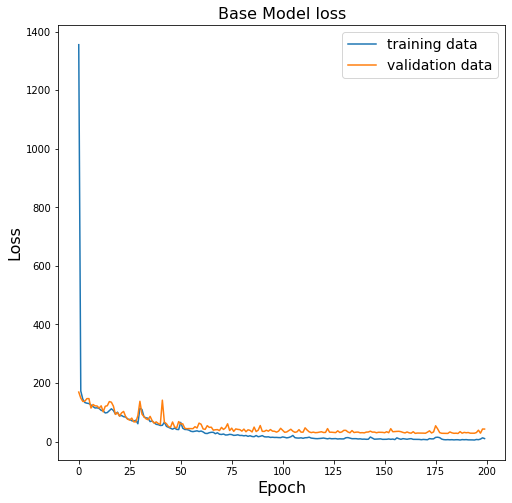

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(history_augment.history['loss'])
plt.plot(history_augment.history['val_loss'])
plt.title('Base Model loss',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.legend(['training data', 'validation data'], loc='upper right',fontsize=14)

## Transfer Learning
Transfer learning uses pre-trained models and corresponding weights to augment our base model. This is useful:

- To overcome the small train data size we have even after augmentation. 
- Provides better accuracy as the model has been trained already by several million images
<p> We have considered MobileNet as it suits our use-case and also due to it's light-weight nature. It also performed well compared to other models such as VGG16, InceptionV3 etc. based on our testing.

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers, applications, callbacks
from tensorflow.keras.applications import DenseNet121  
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import tensorflow.keras.preprocessing.image as tf_image
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
model_transfer_learning = Sequential()

# Use MobileNet pre-trainined model due to it's lightweight computations and suits well with our Facial keypoint detection for mobile application use-case
pretrained_model = applications.MobileNet(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
pretrained_model.trainable = True

# Define input layers
model_transfer_learning.add(layers.Convolution2D(3, (1, 1), padding='same', use_bias=False, input_shape=(96,96,1)))
model_transfer_learning.add(layers.LeakyReLU(alpha = 0.1))

# Introduce pre_trainined model as a layer inbetween by dropping it's existing output layer (included_top = False) as seen in the second line above
model_transfer_learning.add(pretrained_model)
model_transfer_learning.add(layers.GlobalAveragePooling2D())
model_transfer_learning.add(layers.Dropout(0.3))
model_transfer_learning.add(layers.Dense(30,activation='elu'))

model_transfer_learning.summary()

model_transfer_learning.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 3)         3         
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 96, 96, 3)         0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 3, 3, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_4 ( (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                30750     
Total params: 3,259,617
Trainable params: 3,237,729
Non-trainable params: 21,888
_______________________________________

In [ ]:
history_transfer_learning_augment = model_transfer_learning.fit(X_train,y_train,epochs = 250,batch_size = 256,validation_data=(X_dev,y_dev))

Epoch 1/250
21/21 [==============================] - 7s 217ms/step - loss: 1828.1873 - accuracy: 0.1129 - val_loss: 892.9673 - val_accuracy: 0.1269
Epoch 2/250
21/21 [==============================] - 4s 192ms/step - loss: 570.9426 - accuracy: 0.2401 - val_loss: 594.0733 - val_accuracy: 0.2453
Epoch 3/250
21/21 [==============================] - 4s 196ms/step - loss: 222.9855 - accuracy: 0.4077 - val_loss: 391.2330 - val_accuracy: 0.2944
Epoch 4/250
21/21 [==============================] - 4s 199ms/step - loss: 111.0810 - accuracy: 0.4745 - val_loss: 186.7026 - val_accuracy: 0.4673
Epoch 5/250
21/21 [==============================] - 4s 196ms/step - loss: 52.3300 - accuracy: 0.5243 - val_loss: 69.1961 - val_accuracy: 0.6752
Epoch 6/250
21/21 [==============================] - 4s 192ms/step - loss: 26.1767 - accuracy: 0.6081 - val_loss: 44.6618 - val_accuracy: 0.6783
Epoch 7/250
21/21 [==============================] - 4s 198ms/step - loss: 23.6152 - accuracy: 0.6301 - val_loss: 35.7036

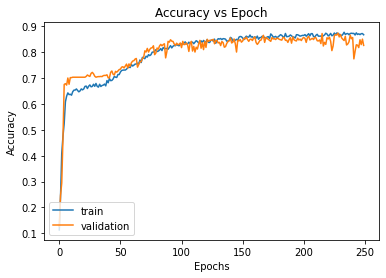

In [ ]:
plt.plot(history_transfer_learning_augment.history['accuracy'])
plt.plot(history_transfer_learning_augment.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()

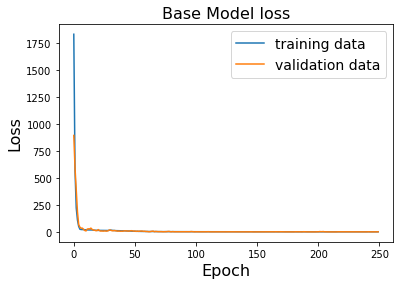

In [ ]:
#plt.figure(figsize=(8,8))
plt.plot(history_transfer_learning_augment.history['loss'])
plt.plot(history_transfer_learning_augment.history['val_loss'])
plt.title('Base Model loss',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.xlabel('Epoch',fontsize=16)
plt.legend(['training data', 'validation data'], loc='upper right',fontsize=14)

## Test Data

Here we visualize the predictions on the test data using the model that performed the best. In our case, this was "model_transfer_learning", which was the model where we dropped data that had missing values and increased the size of the training data size using data augmentation methods and later applied pre-trained neural nets. 

In [ ]:
# Laod test data
df_test = pd.read_csv('test.csv')
df_test.shape

(1783, 2)

In [ ]:
#Convert test data images to numpy array
test_images = convert_data_to_image(df_test)

In [ ]:
%%time
test_preds = model_transfer_learning.predict(test_images)

CPU times: user 664 ms, sys: 14.2 ms, total: 678 ms
Wall time: 694 ms


In [ ]:
test_preds

array([[66.58177 , 35.0434  , 30.411098, ..., 70.49301 , 51.594803,
        83.45485 ],
       [66.56351 , 35.00365 , 30.397743, ..., 70.44331 , 51.608395,
        83.421715],
       [66.550674, 35.03766 , 30.406645, ..., 70.44105 , 51.64615 ,
        83.32666 ],
       ...,
       [66.579765, 34.99425 , 30.397264, ..., 70.432014, 51.605526,
        83.42317 ],
       [66.61526 , 35.055393, 30.41927 , ..., 70.48153 , 51.555717,
        83.43022 ],
       [66.562004, 34.96918 , 30.399776, ..., 70.48713 , 51.609028,
        83.432365]], dtype=float32)

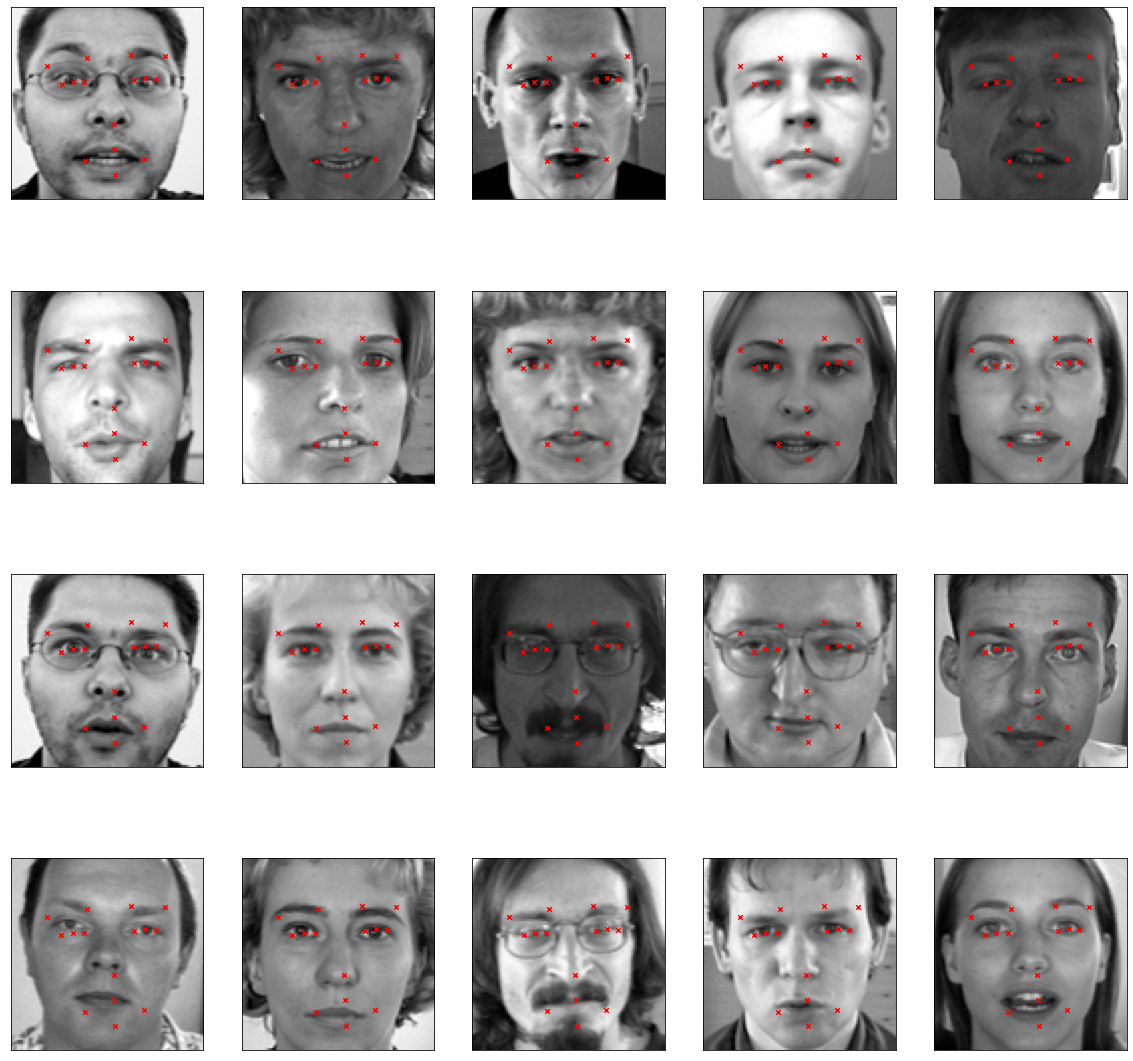

In [ ]:
# Let's see if everything looks good !
fig = plt.figure(figsize=(20,20))
for i in range(20):
    axis = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    plot_sample(test_images[i], test_preds[i], axis, "")
plt.show()


Thus, for facial detection data augmentation coupled with transfer learning proved to be the best approach. As a future work, we can add more augmentation to our training data that, we believe, will improve our accuracy even more. We were successful in beating the previous record of accuracy in this project by a significant amount. 